## How the different checkerboards can be added together for unstable input

In [1]:
import numpy as np
import pandas as pd 

# these are just test one the real ones should be the whole checkerboard 
checkerboard1 = pd.read_csv("../checkerboard_locations/scaled_probe_positions_checkerboard1.csv")
checkerboard2 = pd.read_csv("../checkerboard_locations/scaled_probe_positions_checkerboard2.csv")

def generate_opto_spike_times(df, frequency=100,start=None,end=None):
    probes = df['probe_number']

    # Spike generation
    spike_data = []

    for probe in probes:
        spike_interval = 1000 / frequency  # Interval in ms
        spike_times = np.arange(start, end, spike_interval)  # Generate timestamps
        for timestamp in spike_times:
            spike_data.append((probe, timestamp))

    # Convert spike data to a DataFrame
    spike_df = pd.DataFrame(spike_data, columns=["probe_number", "timestamps"])
    return spike_df
    
spike_df_checkerboard1 = generate_opto_spike_times(checkerboard1,start=100,end=300)
spike_df_checkerboard2 = generate_opto_spike_times(checkerboard2,start=300,end=500)

spike_df = pd.concat([spike_df_checkerboard1, spike_df_checkerboard2], ignore_index=True)

In [2]:
spike_df.to_csv("../../Model-Parameters/opto_input/input_full_2_checkerboards.csv")
spike_df

,probe_number,timestamps
0,4,100.0
1,4,110.0
2,4,120.0
3,4,130.0
4,4,140.0
...,...,...
5555,680,450.0
5556,680,460.0
5557,680,470.0
5558,680,480.0


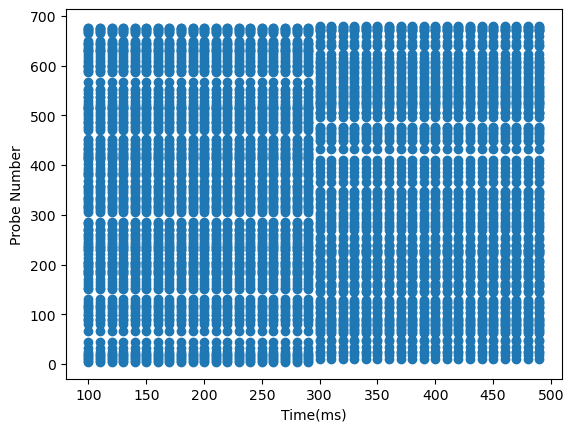

In [3]:
import matplotlib.pyplot as plt

plt.scatter(spike_df['timestamps'],spike_df['probe_number'])
plt.xlabel("Time(ms)")
plt.ylabel("Probe Number")
plt.show()

## combine probe location of checkerboards. We will read in one file with all the used probe locations. The input will decide which ones to use and when

In [5]:
total_probe_locations = pd.concat([checkerboard1, checkerboard2], ignore_index=True)
display(total_probe_locations)
total_probe_locations.to_csv("../../Model-Parameters/opto_input/total_probe_locations_2_checkerboards.csv")

,probe_number,X,Y,Z
0,4,-238.235294,-285.0,1000
1,5,-220.588235,-285.0,1000
2,9,-150.000000,-285.0,1000
3,11,-114.705882,-285.0,1000
4,16,-26.470588,-285.0,1000
...,...,...,...,...
273,672,150.000000,285.0,1000
274,673,167.647059,285.0,1000
275,677,238.235294,285.0,1000
276,678,255.882353,285.0,1000
